In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# Задание 3

In [51]:

df_h1 = pd.read_csv('H1.csv')
df_h2 = pd.read_csv('H2.csv')

# Both hotels are located in Portugal:
# - H1 at the resort region of Algarve
# - H2 at the city of Lisbon
df_h1['Type'] = 'resort'
df_h2['Type'] = 'city'

# merging two parts into one
df = pd.concat([df_h1, df_h2])
df = df.reset_index(drop=True)
def camel_to_snake(s):
    return ''.join(['_'+c.lower() if c.isupper() else c for c in s]).lstrip('_')

df.columns = [camel_to_snake(column_name) for column_name in df.columns]


df['arrival_date_str'] = df['arrival_date_year'].astype('str') + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype('str')
df['arrival_date'] = pd.to_datetime(df['arrival_date_str'])
df['arrival_date_str'] = df['arrival_date'].dt.strftime('%Y-%m-%d')
df['y:m'] = df['arrival_date'].dt.to_period('M')
df_c_1 = df[df['type']=='resort']
df_c_2 = df[df['type']=='city']
df_c_1 = pd.DataFrame({'count':df_c_1.groupby('country')['country'].count()})
df_c_2 = pd.DataFrame({'count':df_c_2.groupby('country')['country'].count()})
all_count_1 = sum(df_c_1['count'])
all_count_2 = sum(df_c_2['count'])
df_c_1['count'] = df_c_1['count'].astype(int)/all_count_1*100
df_c_2['count'] = df_c_2['count'].astype(int)/all_count_2*100
df_1 = df[df['type']=='resort']
df_2 = df[df['type']=='city']
df_1 = pd.DataFrame({'count':df_1.groupby('y:m')['y:m'].count()})
df_2 = pd.DataFrame({'count':df_2.groupby('y:m')['y:m'].count()})
df_1 = df_1.reset_index()
df_2 = df_2.reset_index()
df_c_1 = df_c_1.reset_index().sort_values(by='count', ascending=False)
df_c_2 = df_c_2.reset_index().sort_values(by='count', ascending=False)
df_ym_1 = pd.DataFrame({'count':df[df['type']=='city'].groupby('y:m')['y:m'].count()})
df_ym_1 = df_ym_1.reset_index().sort_values(by='y:m', ascending=True)
df_ym_2 = pd.DataFrame({'count':df[df['type']=='resort'].groupby('y:m')['y:m'].count()})
df_ym_2 = df_ym_2.reset_index().sort_values(by='y:m', ascending=True)
df_ym_2.head(5)

,y:m,count
0,2015-07,1378
1,2015-08,1409
2,2015-09,1585
3,2015-10,1571
4,2015-11,1105


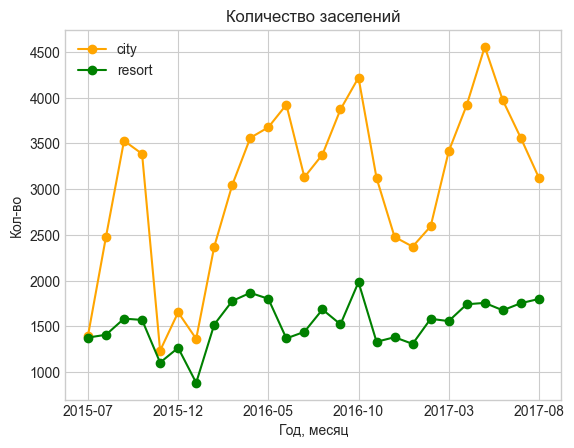

In [4]:

plt.xticks(df_1.index[::5])
plt.plot(df_2['y:m'].astype(str), df_2['count'], '-o', color='orange', label='city')
plt.plot(df_1['y:m'].astype(str), df_1['count'], '-o', color='green', label='resort')
plt.ylabel('Кол-во')
plt.xlabel('Год, месяц')
plt.title('Количество заселений')
plt.legend()


# Задание 4

Text(0.5, 1.0, 'Количество заселений')

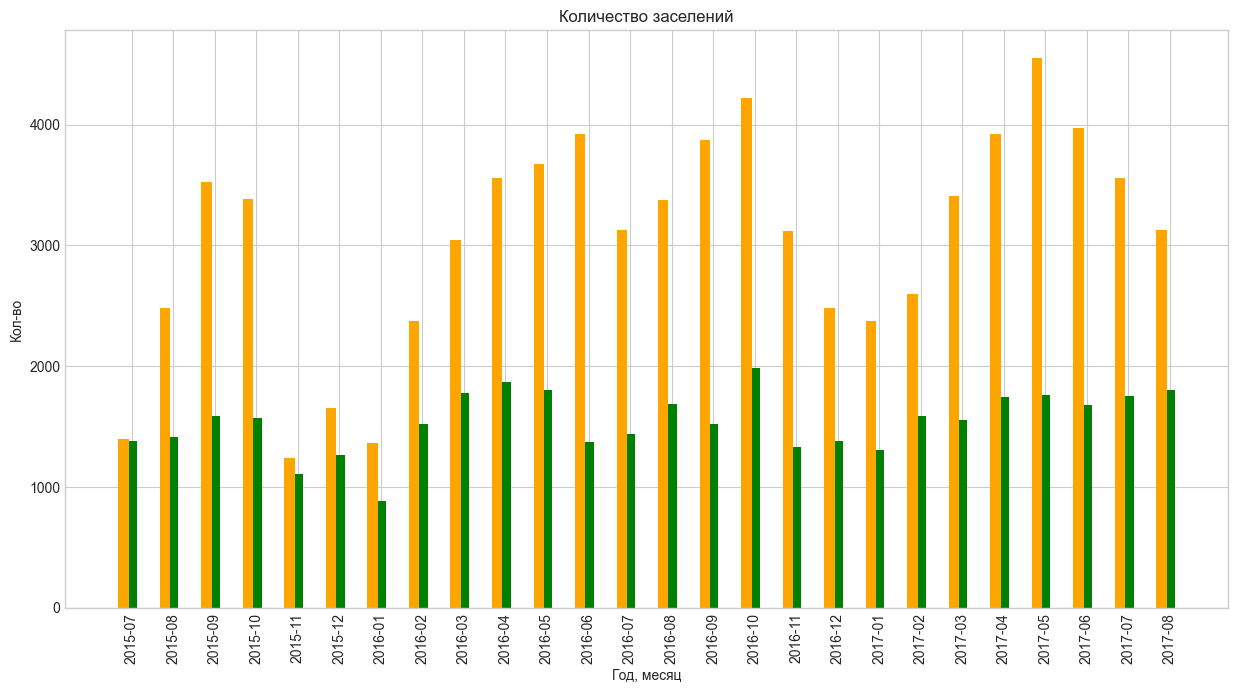

In [5]:
plt.figure(figsize=(15,7.5))
indexes = np.arange(len(df_1['y:m']))
width = 0.1
bar_resort = plt.bar(indexes+width, df_1['count'], width=0.25, color='green', label='resort')
bar_city = plt.bar(indexes-width, df_2['count'], width=0.25, color='orange', label='city')
plt.xticks(indexes+width, df_1['y:m'], rotation=90)
plt.xlabel('Год, месяц')
plt.ylabel('Кол-во')
plt.title('Количество заселений')

# Задание 5

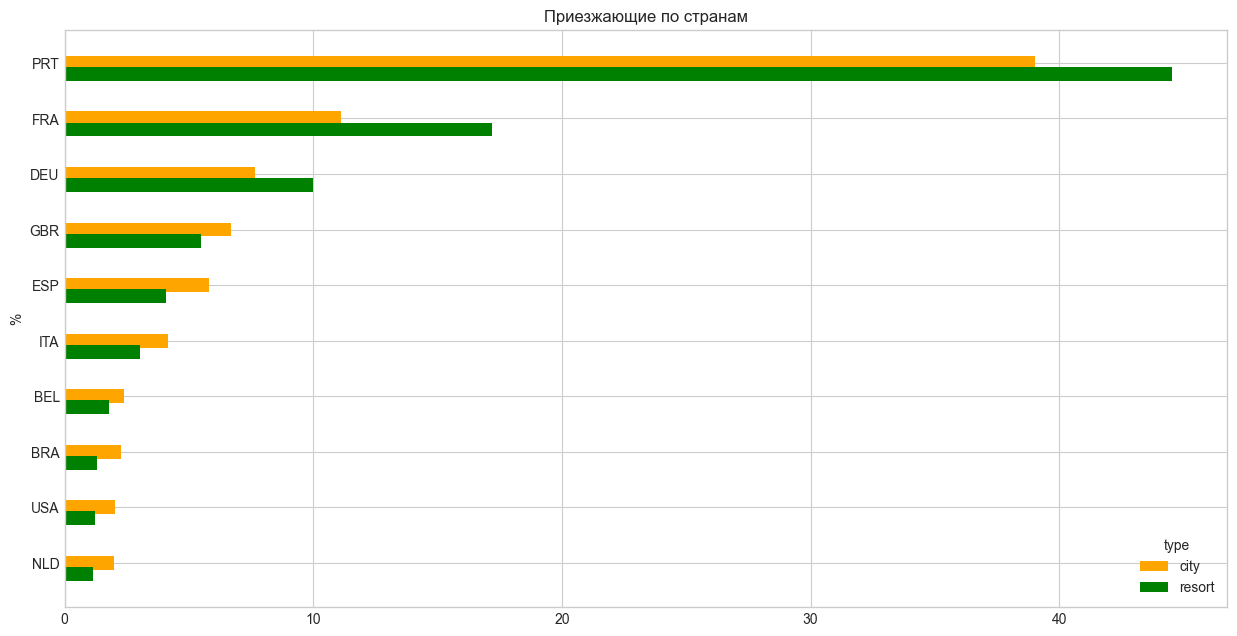

In [6]:
plt.figure(figsize=(15,7.5))    
indexes = np.arange(len(df_c_2['country'][9::-1]))
width = 0.1

plt.barh(indexes+width, df_c_2['count'][9::-1], color='orange', label='city', height=0.25)
plt.barh(indexes-width, df_c_1['count'][9::-1], color='green', label='resort', height=0.25)
plt.yticks(indexes+width, df_c_2['country'][9::-1])
plt.ylabel('%')
plt.title('Приезжающие по странам')
plt.legend(title='type')

# Задание 6

In [24]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'a_d_r',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'type',
       'arrival_date_str', 'arrival_date', 'y:m'],
      dtype='object')>

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     119390 non-null  int64         
 1   lead_time                       119390 non-null  int64         
 2   arrival_date_year               119390 non-null  int64         
 3   arrival_date_month              119390 non-null  object        
 4   arrival_date_week_number        119390 non-null  int64         
 5   arrival_date_day_of_month       119390 non-null  int64         
 6   stays_in_weekend_nights         119390 non-null  int64         
 7   stays_in_week_nights            119390 non-null  int64         
 8   adults                          119390 non-null  int64         
 9   children                        119386 non-null  float64       
 10  babies                          119390 non-null  int64  

# Задание 7

In [57]:
vegetables = sorted(df['arrival_date_year'].unique())
farmers = sorted(df['arrival_date'].dt.month.unique())
harvest = np.array([df_ym_1])

print(np.array(harvest))

# fig, ax = plt.subplots()
# im = ax.imshow(harvest)

# # Show all ticks and label them with the respective list entries
# ax.set_xticks(np.arange(len(farmers)), labels=farmers)
# ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(vegetables)):
#     for j in range(len(farmers)):
#         text = ax.text(j, i, harvest[i, j],
#                        ha="center", va="center", color="w")

# ax.set_title("Harvest of local farmers (in tons/year)")
# fig.tight_layout()
# plt.show()

[[[Period('2015-07', 'M') 1398]
  [Period('2015-08', 'M') 2480]
  [Period('2015-09', 'M') 3529]
  [Period('2015-10', 'M') 3386]
  [Period('2015-11', 'M') 1235]
  [Period('2015-12', 'M') 1654]
  [Period('2016-01', 'M') 1364]
  [Period('2016-02', 'M') 2371]
  [Period('2016-03', 'M') 3046]
  [Period('2016-04', 'M') 3561]
  [Period('2016-05', 'M') 3676]
  [Period('2016-06', 'M') 3923]
  [Period('2016-07', 'M') 3131]
  [Period('2016-08', 'M') 3378]
  [Period('2016-09', 'M') 3871]
  [Period('2016-10', 'M') 4219]
  [Period('2016-11', 'M') 3122]
  [Period('2016-12', 'M') 2478]
  [Period('2017-01', 'M') 2372]
  [Period('2017-02', 'M') 2594]
  [Period('2017-03', 'M') 3412]
  [Period('2017-04', 'M') 3919]
  [Period('2017-05', 'M') 4556]
  [Period('2017-06', 'M') 3971]
  [Period('2017-07', 'M') 3559]
  [Period('2017-08', 'M') 3125]]]
